In [ ]:
# Exploratory Data Analysis on [Dataset Name]

**Dataset Source**: [Link: https://www.kaggle.com/datasets/khushikyad001/screen-time-and-app-usage-dataset-iosandroid]
**Why I Chose This Dataset**:
This dataset was selected because it contains rich numerical and categorical variables. It also matches my personal interests. With over 500 observations, it offers a suitable volume for deep exploratory analysis.

---


20


In [1]:
from google.colab import files
uploaded = files.upload()

Saving screen_time_app_usage_dataset.csv to screen_time_app_usage_dataset.csv


# ## Data Collection and Loading

In this section, I load the dataset using Pandas and preview its structure. The goal is to verify successful loading and understand the data’s basic format.

---


In [2]:
import pandas as pd
df = pd.read_csv('screen_time_app_usage_dataset.csv')
print(df.head(10))

   user_id                           date     app_name       category  \
0     1051  2024-01-01 00:00:00.000000000       Camera      Utilities   
1     1088  2024-01-01 00:43:41.673891297       Chrome      Utilities   
2     1052  2024-01-01 01:27:23.347782594      Spotify  Entertainment   
3     1028  2024-01-01 02:11:05.021673891  Google Maps      Utilities   
4     1034  2024-01-01 02:54:46.695565188    Instagram         Social   
5     1064  2024-01-01 03:38:28.369456485       Chrome      Utilities   
6     1063  2024-01-01 04:22:10.043347782    Instagram         Social   
7     1095  2024-01-01 05:05:51.717239079       Camera      Utilities   
8     1060  2024-01-01 05:49:33.391130376    Instagram         Social   
9     1016  2024-01-01 06:33:15.065021673     Snapchat         Social   

   screen_time_min  launches  interactions  is_productive  youtube_views  \
0            24.53         2             7          False            NaN   
1            19.78         3             2  

In [3]:
print(df.describe())
print(df.info())

           user_id  screen_time_min     launches  interactions  youtube_views  \
count  3000.000000      3000.000000  3000.000000   3000.000000     142.000000   
mean   1049.800667        29.902057     1.993333      4.962000  256577.183099   
std      29.406369        30.561599     1.403547      2.223257  135872.940749   
min    1000.000000         0.010000     0.000000      0.000000    1738.000000   
25%    1024.000000         8.617500     1.000000      3.000000  141490.000000   
50%    1049.000000        20.585000     2.000000      5.000000  249747.000000   
75%    1076.000000        40.415000     3.000000      6.000000  364498.000000   
max    1100.000000       218.390000     9.000000     13.000000  494839.000000   

       youtube_likes  youtube_comments  extra_col_11  extra_col_12  \
count     142.000000        142.000000   3000.000000   3000.000000   
mean    14645.267606       2695.563380     50.062657     50.067177   
std     10511.930022       2147.688995      9.815878      9.

In [6]:
print(df.isnull().sum())

user_id                0
date                   0
app_name               0
category               0
screen_time_min        0
launches               0
interactions           0
is_productive          0
youtube_views       2858
youtube_likes       2858
youtube_comments    2858
extra_col_11           0
extra_col_12           0
extra_col_13           0
extra_col_14           0
extra_col_15           0
extra_col_16           0
extra_col_17           0
extra_col_18           0
extra_col_19           0
extra_col_20           0
extra_col_21           0
extra_col_22           0
extra_col_23           0
dtype: int64


### Above is a high-level summary of the dataset. This includes:
- Total number of rows and columns.
- Column data types.
- Count of missing values.
- Overall statistical summary of numerical columns.

This step helps identify immediate issues such as nulls, duplicates, and unexpected data types.

---


## Before analysis, it's essential to clean the dataset by addressing:
- Missing values.
- Duplicate records.
- Inconsistent data types or formatting.

I define a custom cleaning function to modularize this step, making it reusable and easy to update.

---


In [23]:
def clean_data(df):
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
  return df
  df=clean_data(df)


In [25]:
df.columns

Index(['user_id', 'date', 'app_name', 'category', 'screen_time_min',
       'launches', 'interactions', 'is_productive', 'youtube_views',
       'youtube_likes', 'youtube_comments', 'extra_col_11', 'extra_col_12',
       'extra_col_13', 'extra_col_14', 'extra_col_15', 'extra_col_16',
       'extra_col_17', 'extra_col_18', 'extra_col_19', 'extra_col_20',
       'extra_col_21', 'extra_col_22', 'extra_col_23'],
      dtype='object')

In [26]:
df.duplicated().sum()

np.int64(0)

## Descriptive Statistics

Here, I explore the central tendency and variability of numerical features using:
- Mean
- Median
- Mode
- Variance

For categorical features, I compute frequency counts to understand the distribution of values.

---


In [28]:
df.groupby('app_name')[['screen_time_min', 'extra_col_12', 'extra_col_13', 'extra_col_14']].mean()

,screen_time_min,extra_col_12,extra_col_13,extra_col_14
app_name,,,,
Camera,29.309437,49.596549,49.339225,50.165423
Chrome,28.349012,50.703488,48.873198,49.085872
Evernote,27.598497,49.828235,48.158366,49.675229
Facebook,29.804286,50.514037,49.050124,49.797267
Gmail,26.328049,50.815427,50.117927,50.874390
Google Docs,26.915679,49.948333,50.683025,50.131914
Google Maps,31.771156,50.526599,49.353061,52.051020
Instagram,28.315106,48.722128,50.749149,50.117234
Microsoft Teams,31.625600,48.421667,50.797467,49.762933


In [29]:
df.groupby('category')[['screen_time_min', 'extra_col_12', 'extra_col_13', 'extra_col_14']].mean()

,screen_time_min,extra_col_12,extra_col_13,extra_col_14
category,,,,
Entertainment,29.984513,49.823320,50.221646,49.602112
Productivity,29.592430,50.244316,50.006109,50.244768
Social,31.131429,49.831756,49.297104,50.053303
Utilities,28.888848,50.363881,49.288874,50.081709


## 🔍 Group-Level Analysis

I analyze patterns across different groups (e.g., by category, region, or class). Grouped statistics help uncover differences in means or distributions across categories.

---


In [31]:
df.groupby('category')[['screen_time_min', 'extra_col_12', 'extra_col_13', 'extra_col_14']].median()

,screen_time_min,extra_col_12,extra_col_13,extra_col_14
category,,,,
Entertainment,21.13,49.50,49.79,49.50
Productivity,19.07,49.71,50.28,50.32
Social,21.29,49.87,49.32,50.37
Utilities,20.81,50.79,49.13,50.21


In [35]:
 df.groupby('category')[['screen_time_min', 'extra_col_12', 'extra_col_13', 'extra_col_14']].apply(lambda x: x.mode().iloc[0])


,screen_time_min,extra_col_12,extra_col_13,extra_col_14
category,,,,
Entertainment,11.71,40.71,51.11,48.76
Productivity,3.49,40.25,42.85,41.90
Social,3.55,49.28,59.90,50.26
Utilities,4.77,42.18,48.52,46.92


In [34]:
df.groupby('category')[['screen_time_min', 'extra_col_12', 'extra_col_13', 'extra_col_14']].var()

,screen_time_min,extra_col_12,extra_col_13,extra_col_14
category,,,,
Entertainment,926.931474,96.808177,105.578769,98.642729
Productivity,1033.655968,97.085705,97.938705,105.956654
Social,997.120813,94.698624,105.191223,92.882379
Utilities,778.744311,104.606395,99.835100,104.047919


## Correlation Analysis

The correlation matrix below shows the linear relationships between numerical variables.

**Interpretation**:  
- Values close to +1 or -1 indicate strong relationships.
- This analysis helps identify multicollinearity and key influencing features.

---


In [30]:
df[['screen_time_min', 'extra_col_12', 'extra_col_13', 'extra_col_14']].corr()

,screen_time_min,extra_col_12,extra_col_13,extra_col_14
screen_time_min,1.000000,-0.002172,0.010809,-0.008382
extra_col_12,-0.002172,1.000000,0.008062,-0.010347
extra_col_13,0.010809,0.008062,1.000000,0.007577
extra_col_14,-0.008382,-0.010347,0.007577,1.000000


## Matplotlib Visualizations

Here are basic plots to visualize relationships between variables:
- **Scatter Plot**: To observe trends or clustering between two numerical features.
- **Bar Chart**: To compare aggregated values (like mean) across categories.

Each chart includes titles, axis labels, and legend (where applicable) for clarity.

---


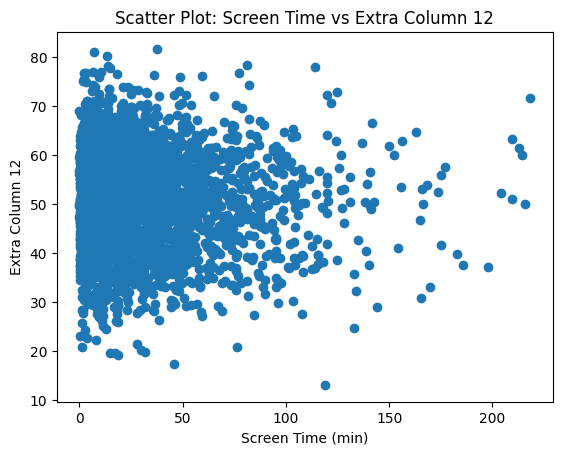

In [37]:
import matplotlib.pyplot as plt
plt.scatter(df['screen_time_min'], df['extra_col_12'])
plt.title('Scatter Plot: Screen Time vs Extra Column 12')
plt.xlabel('Screen Time (min)')
plt.ylabel('Extra Column 12')
plt.show()


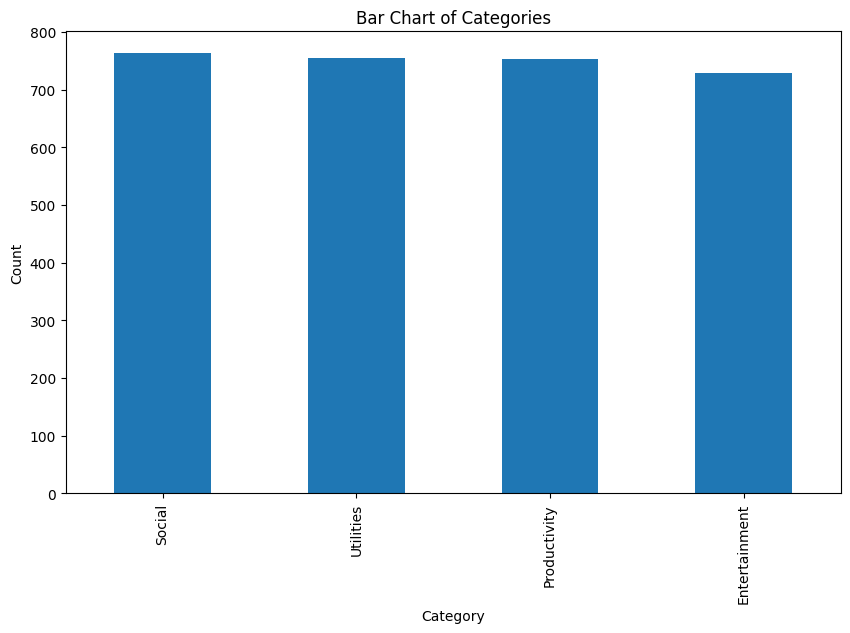

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df['category'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


## Seaborn Visualizations

I use advanced plots to enhance EDA insights:
- **Heatmap**: To visualize correlation strengths across numeric columns.
- **Boxplot**: To show the spread and detect outliers in a variable across categories.

These plots support visual pattern detection, group comparison, and highlight anomalies.

---


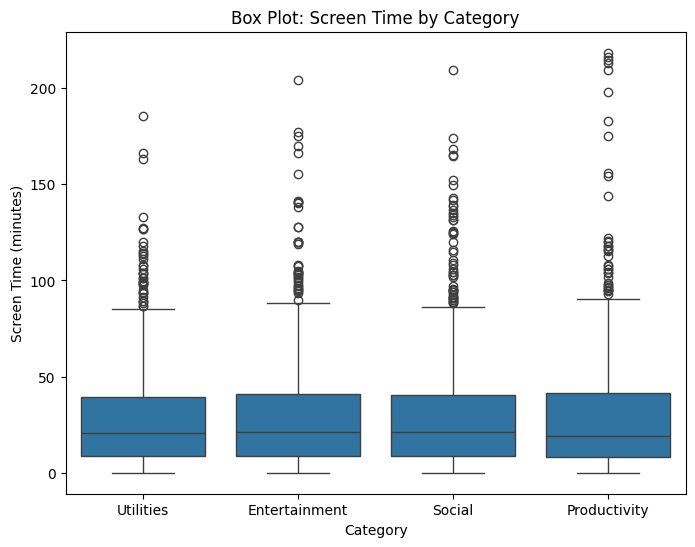

In [40]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='category', y='screen_time_min')
plt.title('Box Plot: Screen Time by Category')
plt.xlabel('Category')
plt.ylabel('Screen Time (minutes)')
plt.show()

## Key Insights and Findings

Based on the analysis and visualizations:
- [Insert Insight 1: e.g., Category A has higher average values than Category B.]
- [Insight 2: There is a strong positive/negative correlation between X and Y.]
- [Insight 3: There are outliers in feature Z affecting the overall distribution.]

---

## Limitations and Biases

While the analysis provides valuable insights, it’s important to acknowledge:
- Missing or imputed data may affect statistical accuracy.
- Dataset may not be representative of all populations or time periods.
- Categorical imbalance may skew some group-level analysis.

---

## Conclusion

This notebook demonstrates the power of EDA in understanding data, identifying patterns, and preparing for more advanced tasks like modeling. Future work could include feature engineering, model training, or domain-specific recommendations.

---
